In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib.lines import Line2D

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
df_mouse = pd.read_csv(mouse_drug_data_to_load)
df_trial = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
df = pd.merge(df_mouse, df_trial, on='Mouse ID', how='right')

# Display the data table for preview
df.head()



,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
df_mean = df.groupby(['Drug','Timepoint'])['Tumor Volume (mm3)'].mean()
# Convert to DataFrame

df_mean = df_mean.reset_index()

# Preview DataFrame
df_mean.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
df_sem = df.groupby(['Drug','Timepoint'])['Tumor Volume (mm3)'].sem()
# Convert to DataFrame
df_sem = df_sem.reset_index()

# Preview DataFrame
df_sem.head()




,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [4]:
# Minor Data Munging to Re-Format the Data Frames
timepoints =np.sort(df_mean['Timepoint'].unique())
drugs = np.sort(df_mean['Drug'].unique())
drugs    
# Preview that Reformatting worked
drug_details = {}
for i in range(len(drugs)):

    drug_details[drugs[i]] = np.array(df_mean.loc[df_mean['Drug'] == drugs[i]]['Tumor Volume (mm3)'])
 
    
df_formatted = pd.DataFrame(drug_details,index=timepoints)
df_formatted.index.name = 'Timepoint'
df_formatted    


,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


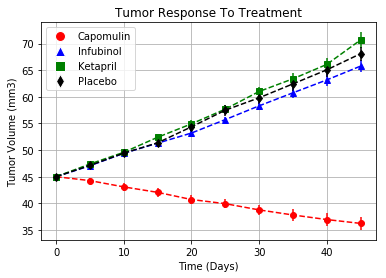

In [5]:
# Generate the Plot (with Error Bars)
#plt.scatter(timepoints,df_formatted['Infubinol'])
#plt.plot(timepoints,df_formatted['Infubinol'],'^b--')
#plt.scatter(timepoints,df_formatted['Ketapril'])
#plt.plot(timepoints,df_formatted['Ketapril'],'sg--')
#plt.scatter(timepoints,df_formatted['Placebo'])
plt.errorbar(timepoints,df_formatted['Capomulin'],
             yerr=np.array(df_sem.loc[df_sem['Drug'] == 'Capomulin','Tumor Volume (mm3)']),
            fmt='or--')
plt.errorbar(timepoints,df_formatted['Infubinol'],
             yerr=np.array(df_sem.loc[df_sem['Drug'] == 'Infubinol','Tumor Volume (mm3)']),
            fmt='^b--')
plt.errorbar(timepoints,df_formatted['Ketapril'],
             yerr=np.array(df_sem.loc[df_sem['Drug'] == 'Ketapril','Tumor Volume (mm3)']),
            fmt='sg--')
plt.errorbar(timepoints,df_formatted['Placebo'],
             yerr=np.array(df_sem.loc[df_sem['Drug'] == 'Placebo','Tumor Volume (mm3)']),
            fmt='dk--')
legend_elements = [Line2D([0], [0], marker='o', color='w', label='Capomulin',markerfacecolor='red', markersize=10),
                  Line2D([0], [0], marker='^', color='w', label='Infubinol',markerfacecolor='b', markersize=10),
                  Line2D([0], [0], marker='s', color='w', label='Ketapril',markerfacecolor='g', markersize=10),
                  Line2D([0], [0], marker='d', color='w', label='Placebo',markerfacecolor='k', markersize=10)]
plt.legend(handles=legend_elements,loc='best')
plt.xlabel('Time (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Tumor Response To Treatment')
plt.grid()

plt.savefig('plot_tumorresponse.png')
# Save the Figure



In [6]:
# Show the Figure
plt.show()

## Metastatic Response to Treatment

In [7]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 

df_meta_mean = df.groupby(['Drug','Timepoint'])['Metastatic Sites'].mean()
# Convert to DataFrame
df_meta_mean = df_meta_mean.reset_index()
# Preview DataFrame
df_meta_mean.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [8]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
df_meta_sem = df.groupby(['Drug','Timepoint'])['Metastatic Sites'].sem()

# Convert to DataFrame
df_meta_sem = df_meta_sem.reset_index()
# Preview DataFrame
df_meta_sem.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [9]:
# Minor Data Munging to Re-Format the Data Frames


timepoints_meta =np.sort(df_meta_mean['Timepoint'].unique())
drugs_meta = np.sort(df_meta_mean['Drug'].unique())
    
# Preview that Reformatting worked
drug_details_meta = {}
for i in range(len(drugs_meta)):

    drug_details_meta[drugs_meta[i]] = np.array(df_meta_mean.loc[df_meta_mean['Drug'] == drugs_meta[i]]['Metastatic Sites'])
 
    
df_formatted_meta = pd.DataFrame(drug_details_meta,index=timepoints_meta)
df_formatted_meta.index.name = 'Timepoint'
df_formatted_meta 


,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


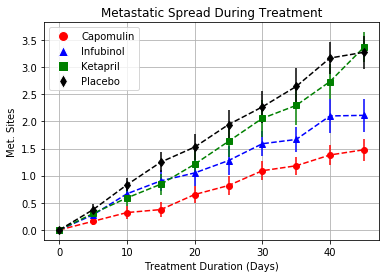

In [10]:
# Generate the Plot (with Error Bars)
plt.errorbar(timepoints_meta,df_formatted_meta['Capomulin'],
             yerr=np.array(df_meta_sem.loc[df_meta_sem['Drug'] == 'Capomulin','Metastatic Sites']),
            fmt='or--')
plt.errorbar(timepoints_meta,df_formatted_meta['Infubinol'],
             yerr=np.array(df_meta_sem.loc[df_meta_sem['Drug'] == 'Infubinol','Metastatic Sites']),
            fmt='^b--')
plt.errorbar(timepoints_meta,df_formatted_meta['Ketapril'],
             yerr=np.array(df_meta_sem.loc[df_meta_sem['Drug'] == 'Ketapril','Metastatic Sites']),
            fmt='sg--')
plt.errorbar(timepoints_meta,df_formatted_meta['Placebo'],
             yerr=np.array(df_meta_sem.loc[df_meta_sem['Drug'] == 'Placebo','Metastatic Sites']),
            fmt='dk--')

plt.legend(handles=legend_elements,loc='best')

plt.xlabel('Treatment Duration (Days)')
plt.ylabel('Met. Sites')
plt.title('Metastatic Spread During Treatment')
plt.grid()

plt.savefig('plot_metastatic.png')

In [11]:
plt.show()

## Survival Rates

In [12]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
df_survival = df.groupby(['Drug','Timepoint'])['Mouse ID'].count()
# Convert to DataFrame
df_survival = df_survival.reset_index()
df_survival = df_survival.rename(columns={'Mouse ID': 'Mouse Count'})
# Preview DataFrame
df_survival.head()


,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [13]:
# Minor Data Munging to Re-Format the Data Frames
timepoints_survival =np.sort(df_survival['Timepoint'].unique())
drugs_survival = np.sort(df_survival['Drug'].unique())
    
# Preview that Reformatting worked
drug_details_survival = {}
for i in range(len(drugs_survival)):

    drug_details_survival[drugs_survival[i]] = np.array(df_survival.loc[df_survival['Drug'] == drugs_survival[i]]['Mouse Count'])
 
    
df_formatted_survival = pd.DataFrame(drug_details_survival,index=timepoints_survival)
df_formatted_survival.index.name = 'Timepoint'
df_formatted_survival 


,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


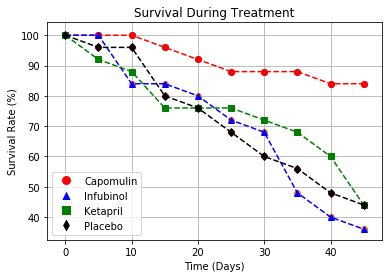

In [14]:
# Generate the Plot (Accounting for percentages)

# Generate the Plot (with Error Bars)

def getsurvivalrates(items):
    base_value = items[0]
    return [(100-((base_value -x)/base_value)*100) for x in items]


plt.scatter(timepoints,getsurvivalrates(df_formatted_survival['Capomulin']))
plt.plot(timepoints,getsurvivalrates(df_formatted_survival['Capomulin']),'or--')

plt.scatter(timepoints,getsurvivalrates(df_formatted_survival['Infubinol']))
plt.plot(timepoints,getsurvivalrates(df_formatted_survival['Infubinol']),'^b--')

plt.scatter(timepoints,getsurvivalrates(df_formatted_survival['Ketapril']))
plt.plot(timepoints,getsurvivalrates(df_formatted_survival['Ketapril']),'sg--')

plt.scatter(timepoints,getsurvivalrates(df_formatted_survival['Placebo']))
plt.plot(timepoints,getsurvivalrates(df_formatted_survival['Placebo']),'dk--')


plt.xlabel('Time (Days)')
plt.ylabel('Survival Rate (%)')
plt.title('Survival During Treatment')
plt.grid()
plt.legend(handles=legend_elements,loc='best')
plt.savefig('plot_survival.png')



## Summary Bar Graph

In [15]:
# Calculate the percent changes for each drug
def getPercentageChange(items):
    base = items[0]
    final = items[len(items) -1]
    return ((final-base)/base)*100


# Display the data to confirm

drugList = df['Drug'].unique()
changes = [getPercentageChange(np.array(df_formatted[x])) for x in drugList]
changes

df_summary = pd.DataFrame({
    'Drug': drugList,
    'Tumor Change %': changes
})
df_summary = df_summary.sort_values(by='Drug')
df_summary
#df_mean_summary = df_mean[['Drug','Tumor Volume (mm3)']]
#df_mean_summary['Drug']





,Drug,Tumor Change %
4,Capomulin,-19.475303
6,Ceftamin,42.516492
5,Infubinol,46.123472
3,Ketapril,57.028795
2,Naftisol,53.923347
9,Placebo,51.297960
1,Propriva,47.241175
8,Ramicane,-22.320900
0,Stelasyn,52.085134
7,Zoniferol,46.579751


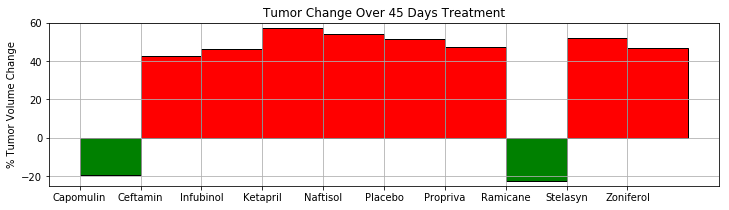

In [16]:
# Store all Relevant Percent Changes into a Tuple
plt.show()
colors = ['g' if x < 0 else 'r' for x in np.array(df_summary['Tumor Change %']) ]

# Splice the data between passing and failing drugs

drugList = np.sort(drugList)
# Orient widths. Add labels, tick marks, etc. 
plt.bar(drugList,np.array(df_summary['Tumor Change %']),
        color=colors, align='edge',width=1.0,edgecolor='black',)
plt.xticks(drugList,rotation='horizontal')
plt.title('Tumor Change Over 45 Days Treatment')
plt.ylabel('% Tumor Volume Change')
plt.grid()
plt.ylim(-25,60)
fig = plt.gcf()
fig.set_size_inches(12,3)

#fig.show()
plt.savefig('summary_bar.png')
plt.show()